In [1]:
# Загрузка данных
# Ссылка на датасет: http://archive.ics.uci.edu/ml/datasets/Wine+Quality
import pandas as pd
white_wine = pd.read_csv('winequality/winequality-white.csv', sep = ';')
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [2]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [3]:
# количество пропущенных значений
white_wine.isnull().sum()/len(white_wine)*100

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

# boxplot
Границами ящика служат первый и третий квартили (25-й и 75-й процентили соответственно), линия в середине ящика — медиана (50-й процентиль). Концы усов — края статистически значимой выборки (без выбросов). Данные, выходящие за границы усов (выбросы), отображаются на графике в виде точек

Populating the interactive namespace from numpy and matplotlib


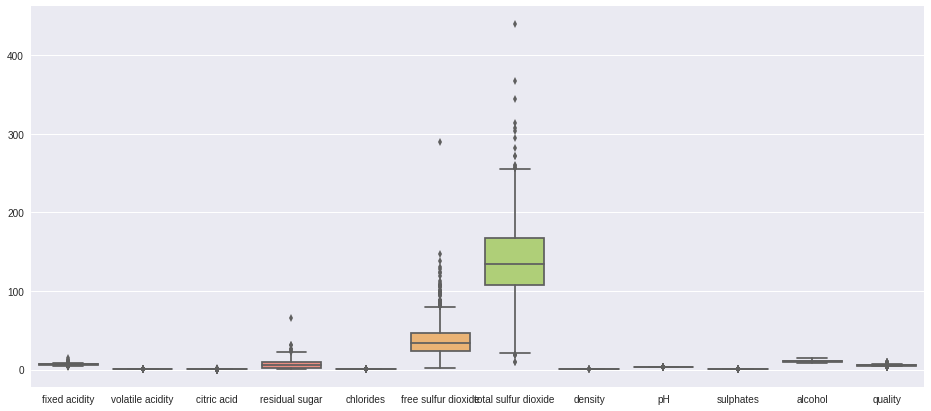

In [6]:
%matplotlib inline
%pylab inline
import matplotlib as mpl
pylab.rcParams['figure.figsize'] = (16, 7)
mpl.rcParams['figure.figsize'] = (16,7)

import matplotlib
import seaborn as sns 

ax = sns.boxplot(data=white_wine, palette="Set3")

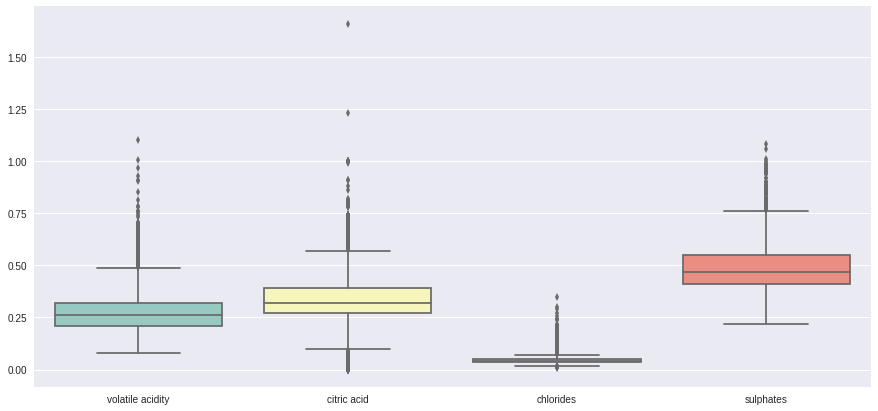

In [5]:
ax = sns.boxplot(data=white_wine[['volatile acidity', 'citric acid', 'chlorides', 'sulphates']], palette="Set3")

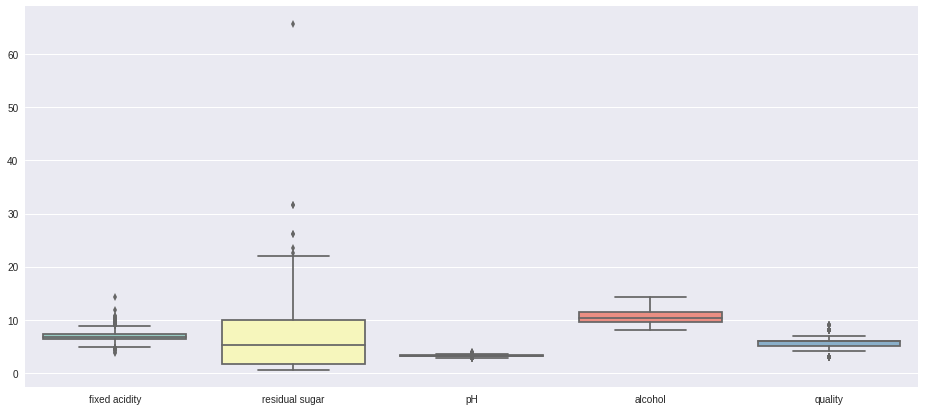

In [7]:
ax = sns.boxplot(data=white_wine[['fixed acidity', 'residual sugar', 'pH', 'alcohol', 'quality']], palette="Set3")

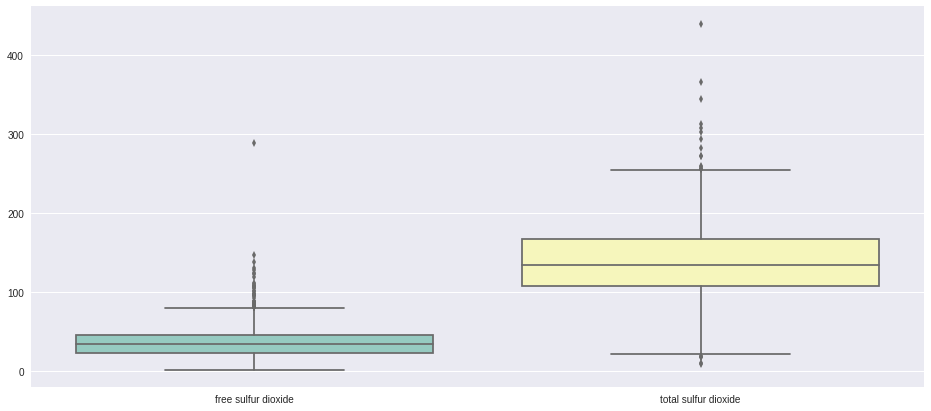

In [8]:
ax = sns.boxplot(data=white_wine[['free sulfur dioxide', 'total sulfur dioxide']], palette="Set3")

/home/evanskaya/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


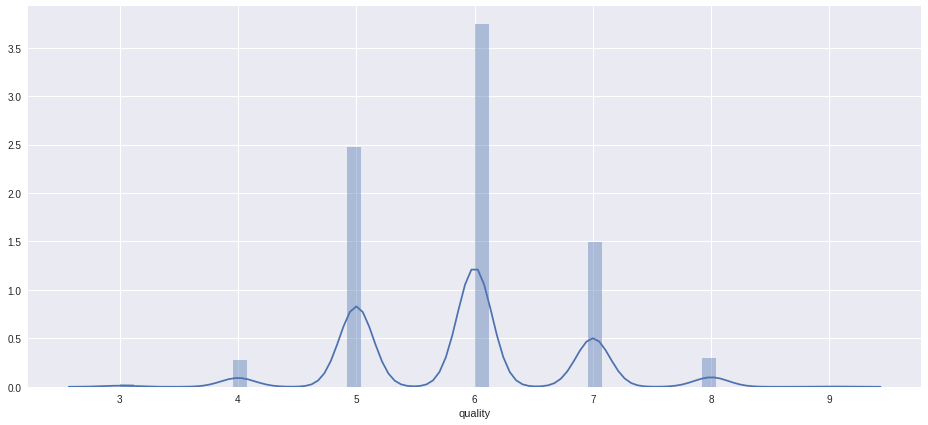

In [14]:
# Распределение целевой переменной
ax = sns.distplot(white_wine.quality)

/home/evanskaya/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


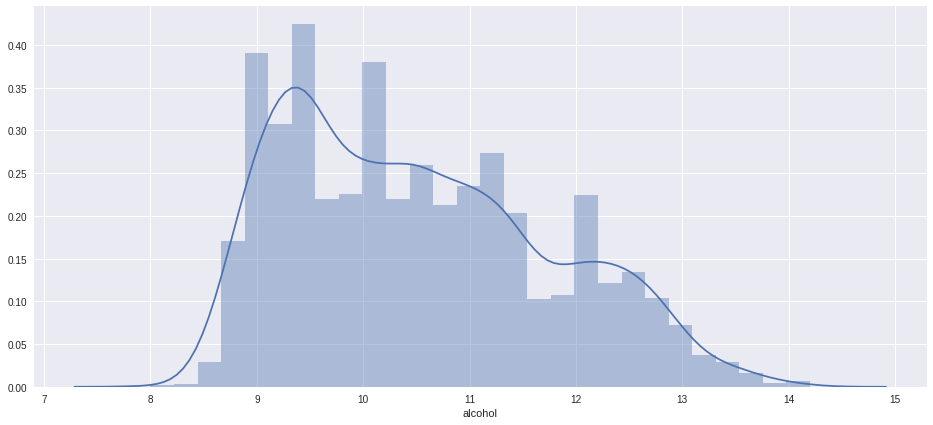

In [15]:
sns.distplot(white_wine.alcohol)

# Категориальные признаки

In [12]:
titanic = sns.load_dataset("titanic")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.2+ KB


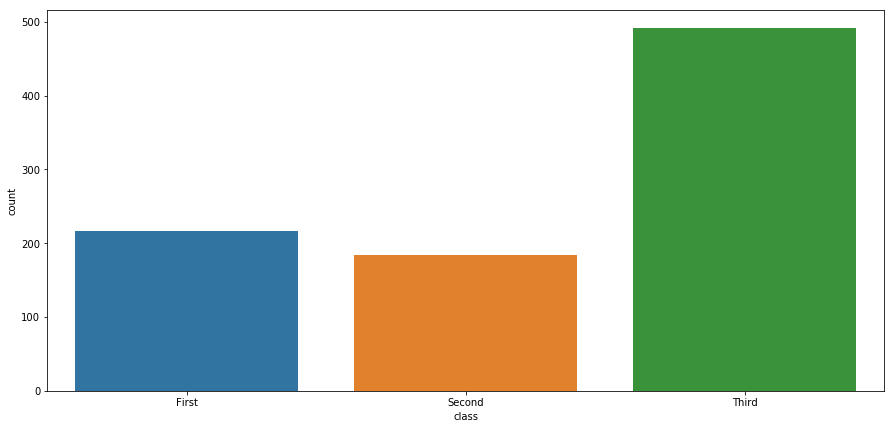

In [27]:
sns.countplot(x="class", data=titanic)

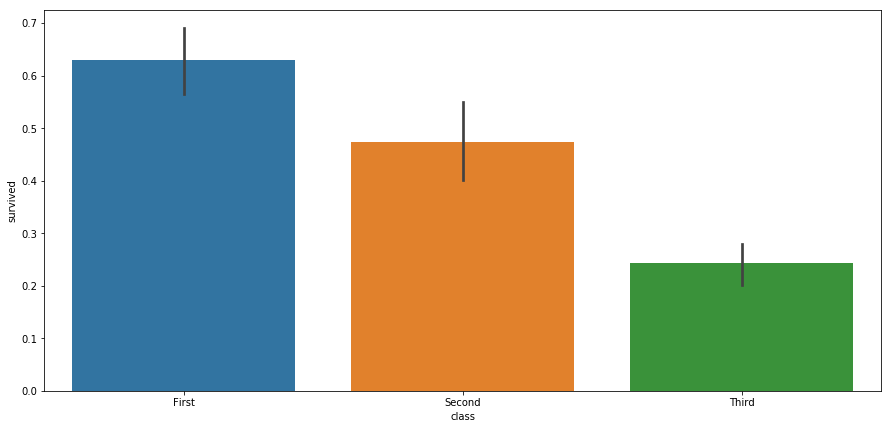

In [19]:
sns.barplot(x="class", y="survived", data=titanic)

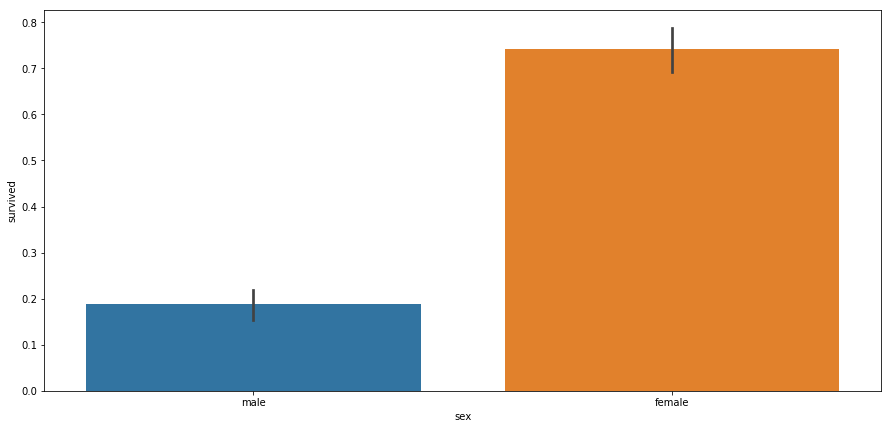

In [23]:
sns.barplot(x="sex", y="survived", data=titanic)

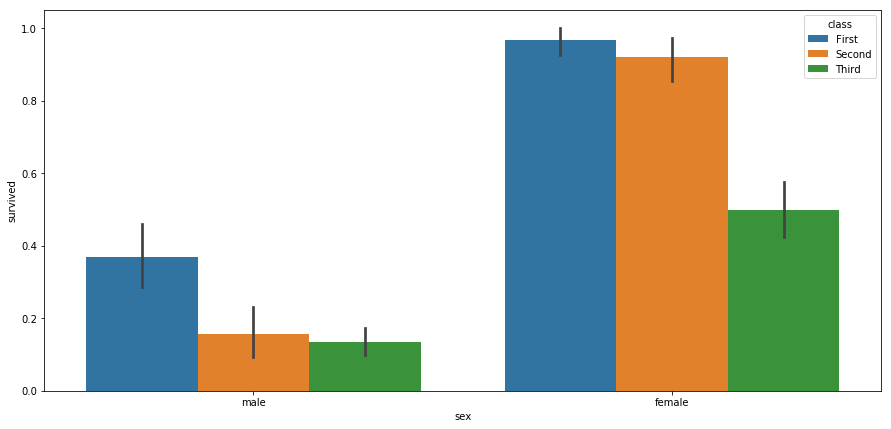

In [20]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

# Ищем зависимости

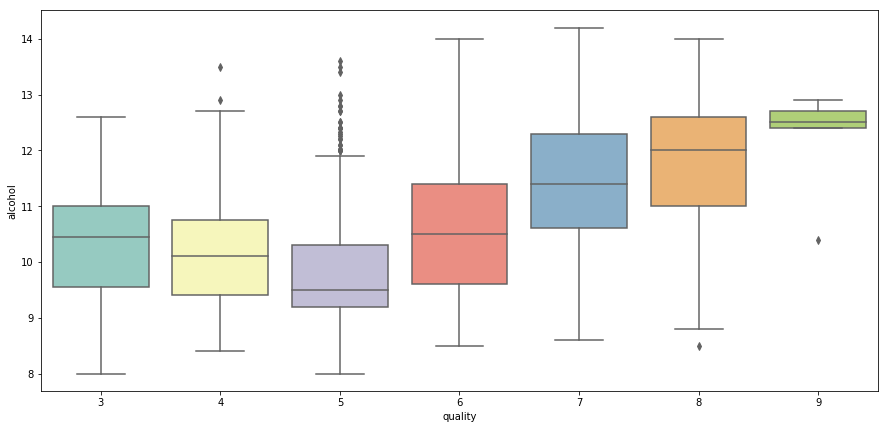

In [10]:
ax = sns.boxplot(data=white_wine, x="quality", y="alcohol", palette="Set3")

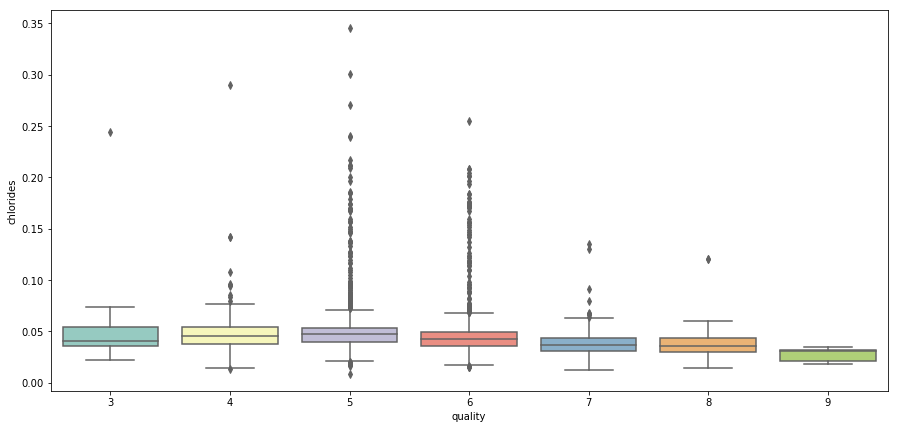

In [30]:
ax = sns.boxplot(data=white_wine, x="quality", y="chlorides", palette="Set3")

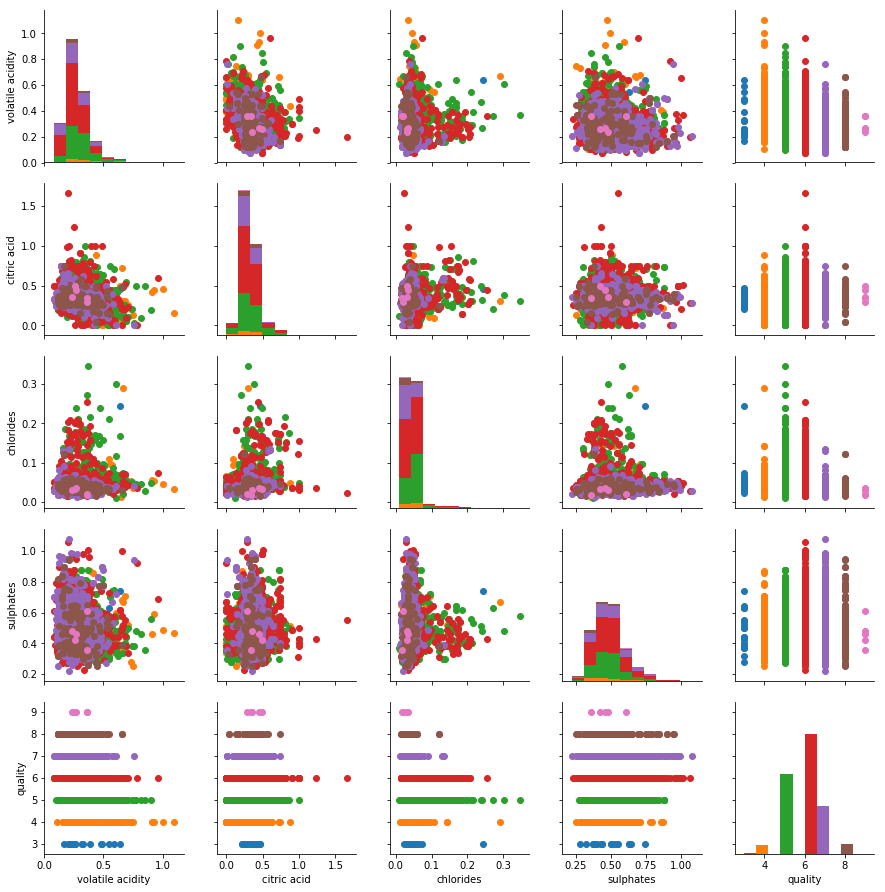

In [36]:
# Чтобы не перебирать руками
# plot multiple pairwise bivariate distributions in a dataset

g = sns.PairGrid(white_wine[['volatile acidity', 'citric acid', 'chlorides', 'sulphates', 'quality']], 
                 hue="quality")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

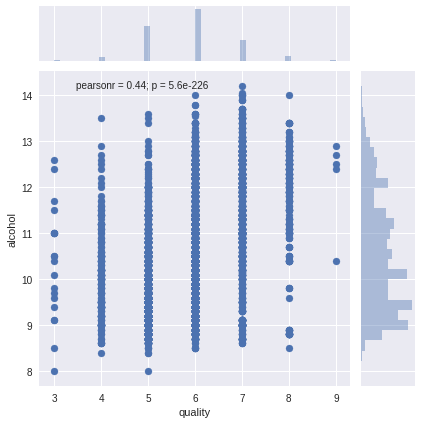

In [10]:
# Посмотрим подробнее на какую-нибудь пару
# Строит распределение каждой переменной
# Представляет каждое наблюдение точкой на плоскости и считает Pearson correlation coefficient

ax = sns.jointplot(x="quality", y="alcohol", data=white_wine);

In [19]:
# Compute pairwise correlation of columns, excluding NA/null values
corr_matrix = white_wine.corr(method='pearson')

In [21]:
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


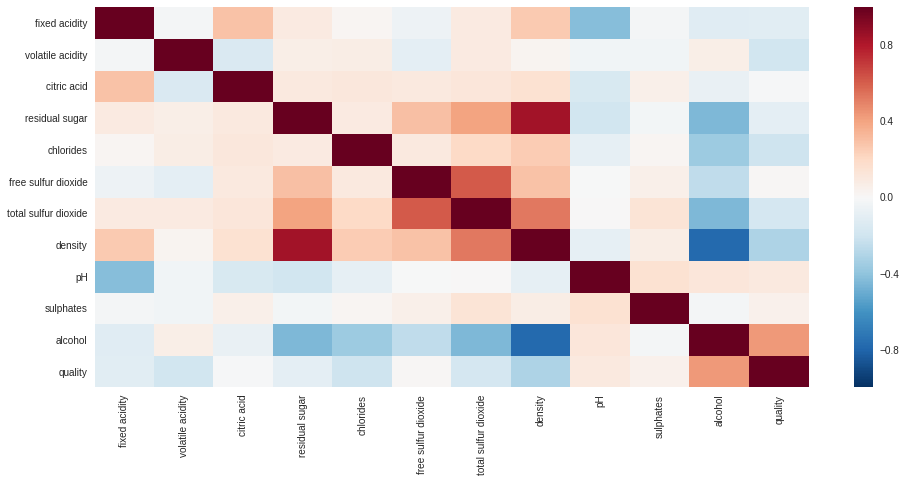

In [20]:
# Красиво визуализируем попарную корреляцию всех фич
sns.heatmap(corr_matrix)

# Узнаем, что качество положительно коррелирует с уровнем алкоголя
# Остаточный сахар положительно коррелирует с плотностью и т.д.

# Кластеризация

In [23]:
%%time
# t-distributed stochastic neighbor embedding (t-SNE)
# Для нас - хак, позволяющий на плоскости визуализировать многомерные данные

from sklearn.manifold import TSNE

tsne_model = TSNE(2, random_state=42)
white_wine_2d = tsne_model.fit_transform(white_wine)

CPU times: user 1min 10s, sys: 4.51 s, total: 1min 14s
Wall time: 1min 14s


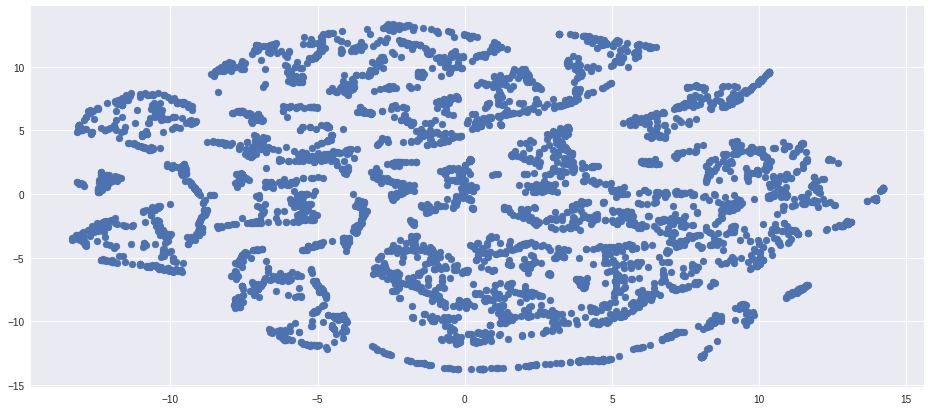

In [24]:
# Визуализируем результат

plt.scatter(white_wine_2d[:, 0], white_wine_2d[:, 1])

In [27]:
# Зачем все это? Кластеризация
# Кластеризация — это задача разбиения множества объектов на сравнительно однородные группы, называемые кластерами
# т.е. ожидаем, что "близкие"/ "похожие" объекты окажутся в одних кластерах. Но как это проверить?

from sklearn.cluster import KMeans
from collections import Counter

kmeans_model = KMeans(10)
wine_kmeans_20 = kmeans_model.fit_predict(white_wine)
Counter(wine_kmeans_20).values()

dict_values([564, 694, 744, 470, 289, 800, 637, 316, 377, 7])

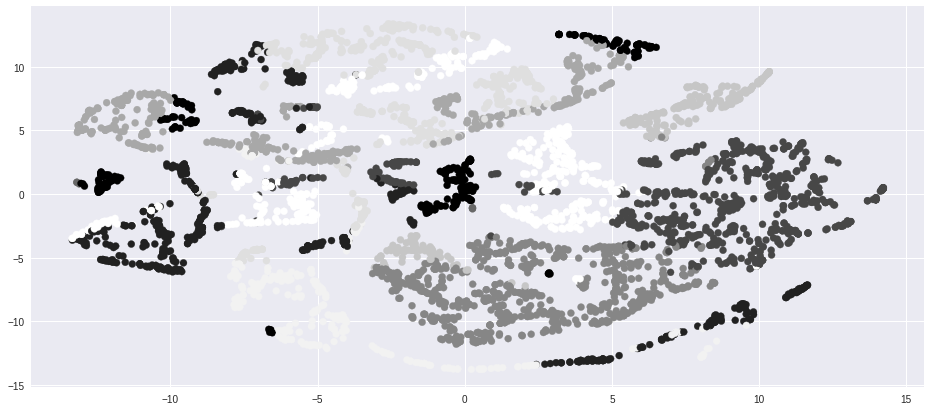

In [28]:
# Визуализируем кластеризацию

plt.scatter(white_wine_2d[:, 0], white_wine_2d[:, 1], c = wine_kmeans_20)